# Incomplete Gamma Funciton

The Cutoff Power-law and the lower part of the Band Function are both the same function:

\begin{equation}
f_{\text{COMP}}(E) = E^{\alpha} \ \text{exp} \left( - \frac{ E}{E_0} \right).
\end{equation}

When integrating this function to use for spectral modeling, it requires you to integrate over an exponentail of this format: <br>
x = Energy, <br>
a = $\alpha$ <br>
z = $E_0$ <br>
<br>
\begin{equation}
f(x) = x^{a} \ \text{exp} \left( - \frac{ x}{z} \right).
\end{equation}

Looking this up in a book under definite integrals involving exponentail functions gives us: 

\begin{equation}
\int_{0}^{oo} x^n e^{-ax} dx = \frac{\Gamma \left( n+1 \right)}{a^{n+1}}
\end{equation}

Here, x is the Energy, n is the $\alpha$ parameter, and a is the factor of (1/$E_0$).
$\Gamma$ represents the Gamma Funciton.  Since n+1 is $\alpha$+1 and alpha is always going to be less than 1 in our case, then $ n+1< 0 $ always.

This gives us the lower incomplete gamma function.

### Definition of the Gamma Function  $\Gamma(n)$  for $n > 0$ :

\begin{equation}
\Gamma(n) = \int_{0}^{oo} t^{n-1} e^{-t} dt  \ \ \ \text{where} \ \ \ n > 0.
\end{equation}

### Recursion Formula

\begin{equation}
\Gamma(n+1) = n \Gamma(n)
\end{equation}

If n = 0, 1, 2, ..., a non-negative integer, we have the following (where 0! = 1):

\begin{equation}
\Gamma(n+1) = n!
\end{equation}

### The Gamma Function for $n < 0$:

\begin{equation}
\Gamma(n) = \frac{\Gamma(n+1)}{n}
\end{equation}

which is the lower incomplete gamma function.

This leads us to the expansion:

When n+1 < 0, this is the lower incomplete gamma funciton.

\begin{equation}
\Gamma(n+1) = lim_{k\rightarrow oo} \frac{1 \cdot 2 \cdot 3 \cdot \ ...\  \cdot k}{(n+1)(n+2)(n+3)...(n+k)}\cdot k^{n}
\end{equation}

In our case, n is $\alpha$, so this becomes:
\begin{equation}
\Gamma(\alpha+1) = lim_{k\rightarrow oo} \frac{1 \cdot 2 \cdot 3 \cdot \ ...\  \cdot k}{(\alpha+1)(\alpha+2)(\alpha+3)...(\alpha+k)}\cdot k^{\alpha}
\end{equation}

## Upper and Lower Incomplete Gamma functions:

### Upper Incomplete Gamma Function:

\begin{equation}
\Gamma(n, x) = \int_{x}^{oo} t^{n-1} e^{-t} dt  \ \ \ \ \ \ \ 
\end{equation}

### Lower Incomplete Gamma Function:

\begin{equation}
\gamma(n, x) = \int_{0}^{x} t^{n-1} e^{-t} dt     \ \ \ \ \ \ \  
\end{equation}

In both cases n is a complex parameter, such that the real part of n is positive.
By integration by parts we find the recurrence relations:

\begin{equation}
\Gamma(n+1) = n \Gamma(n)
\end{equation}

By integration by parts we find the recurrence relations:

\begin{equation}
\Gamma(n+1, x) = n \Gamma(n, x) + x^n e^{-x}
\end{equation}

and conversely,

\begin{equation}
\gamma(n+1, x) = n \gamma(n, x) - x^n e^{-x}
\end{equation}





Since the ordinary gamma function is defined as:
\begin{equation}
\Gamma(n) = \int_{0}^{oo} t^{n-1} e^{-t} dt
\end{equation}

we have

\begin{equation}
\Gamma(n) = \Gamma(n,0)
\end{equation}

and 

\begin{equation}
\gamma(n,x) + \Gamma(n,x) = \Gamma(n)
\end{equation}


LowerGammaFn + UpperGammaFn = GammaFunction

## Putting this to use:

In [1]:
from __future__ import division
import numpy

In [2]:
import sympy as sy
import scipy.special as scp
import mpmath as mp

In [3]:
a = -1.46204
x = 1000.0
z = 455.23592

### Sympy's lowergamma and uppergamma are the lower and upper parts to the incomplete gamma funciton.
See more here:
http://docs.sympy.org/dev/modules/functions/special.html#sympy.functions.special.gamma_functions.lowergamma

In [4]:
# lowergamma(alpha + 1, E/E0)

In [5]:
sy.lowergamma(a+1., x/z)

-3.59578794007091

In [6]:
sy.uppergamma(a+1., x/z)

0.0230084005118086

In [7]:
sy.gamma(a+1.) # gamma function

-3.57277953955910

In [8]:
sy.lowergamma(a+1., x/z) + sy.uppergamma(a+1., x/z) # lower + upper = gamma 

-3.57277953955910

## mpmath's incomplete gamma funciton.
More info here:
http://mpmath.readthedocs.io/en/latest/functions/expintegrals.html#incomplete-gamma-functions

gammainc computes the generalized incomplete gamma funciton with integration limits [a,b].
gammainc(z,a,b)
for the lower function, use:
gammainc(z, 0, b)
for the upper funciton, use:
gammainc(z, a, inf)

In [9]:
#help(mp.gammainc)

### Lower Incomplete Gamma Function:

Three ways of writing it:
    1. mp.gammainc(a+1., a=0, b=x/z)
    2. mp.gammainc(a+1., b=x/z)
    3. mp.gammainc(a+1., 0, x/z) 
a is the lower limit, defaulted at 0. <br />
b is the upper limit, defaulted at infinity.

In [10]:
mp.gammainc(a+1., a=0, b=x/z)

mpf('-3.5957879400709065')

In [11]:
mp.gammainc(a+1., b=x/z)

mpf('-3.5957879400709065')

In [12]:
mp.gammainc(a+1., 0, x/z)

mpf('-3.5957879400709065')

### Upper Incomplete Gamma Function:

Three ways of writing it:
    1. mp.gammainc(a+1., a=x/z, b='inf')
    2. mp.gammainc(a+1., a=x/z)
    3. mp.gammainc(a+1., x/z) 
a is the lower limit, defaulted at 0. <br />
b is the upper limit, defaulted at infinity.

In [13]:
mp.gammainc(a+1., a=x/z, b='inf')

mpf('0.023008400511808646')

In [14]:
mp.gammainc(a+1., a=x/z)

mpf('0.023008400511808646')

In [15]:
mp.gammainc(a+1., x/z)  # this is the uppergamma for sympy

mpf('0.023008400511808646')

### So output from Sympy's lowergamma should be input to mp.gammainc as:

In [16]:
print sy.lowergamma(a+1., x/z)  # output
print mp.gammainc(a+1., 0, x/z)  # input

-3.59578794007091
-3.59578794007091


In [17]:
import time
start_time = time.time()
print sy.lowergamma(a+1., x/z)
print("--- %s seconds ---" % (time.time() - start_time))

-3.59578794007091
--- 0.000396013259888 seconds ---


In [18]:
import time
start_time = time.time()
print mp.gammainc(a+1., 0, x/z)
print("--- %s seconds ---" % (time.time() - start_time))

-3.59578794007091
--- 0.00141978263855 seconds ---


In [19]:
a = -1.46204
x = 1000.0 # Energy
z = 455.23592 # E_0

In [20]:
k = 1

((k/(a))*(k**a))/((x/z)**(a+1))

-0.983895881239796

In [21]:
k = numpy.arange(1,3+1,1)

In [22]:
r = 1
for i in k:
    r *= k


When x+1 < 0, this is the lower incomplete gamma funciton.

\begin{equation}
\Gamma(x+1) = lim_{k\rightarrow oo} \frac{1 \cdot 2 \cdot 3 \cdot \ ...\  \cdot k}{(x+1)(x+2)(x+3)...(x+k)}\cdot k^{x}
\end{equation}

\begin{equation}
\Gamma(x+1) = lim_{k\rightarrow oo} \frac{1 \cdot 2 \cdot 3 \cdot \ ...\  \cdot k}{(x+1)(x+2)(x+3)...(x+k)}\cdot k^{x}
\end{equation}

In [23]:
import math 

a = -1.46204
x = 1000.0 # Energy
z = 455.23592 # E_0
k = 2
m = math.factorial(k)
d = numpy.arange(1,k+1,1)

In [24]:
kz = []
def kz_product(a,d):
    for i in d:
        kz.append(a+i)
    product = numpy.prod(kz)
    return product

In [25]:
mmm = kz_product(a,d); mmm

-0.24855903839999999

In [26]:
((m*(k**a)) / mmm ) #/ ((x/z)**(a+1.))

-2.9206703425001006

The above don't match the right answers.

In [27]:
sy.lowergamma(a+1., x/z)

-3.59578794007091

In [28]:
sy.lowergamma(a+1., x/z)

-3.59578794007091

In [29]:
mp.gammainc(a+1., b=x/z)

mpf('-3.5957879400709065')

In [30]:
mp.gammainc(a+1., 0, x/z)

mpf('-3.5957879400709065')

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# sy.lowergamma(a+1., x/z) + sy.uppergamma(a+1., x/z)

In [33]:
alpha = -1.46204
epk = 455.23592
engs = numpy.logspace(1,4,400)

# Plots of upper gamma

In [34]:
# sys.gamma(a,z)

In [35]:
a = numpy.array([.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0])
z = numpy.arange(0, 100, 1)

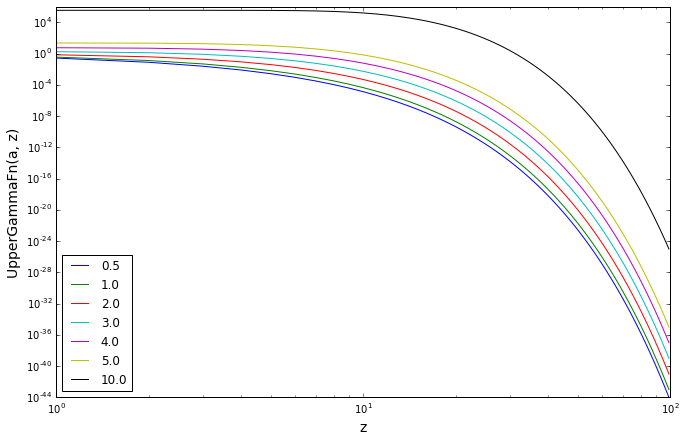

In [36]:
plt.figure(figsize=(11,7))
# sy.uppergamma(a, z)
plt_x = []
for k,anum in enumerate(a):
    plt_y = []
    for i,znum in enumerate(z):  # point for each z value
        plt_y.append(sy.uppergamma(anum, znum))
    plt_x = z # all of z's
    plt.plot(plt_x, plt_y, '-', label='%s'%anum)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)',fontsize=14)
plt.legend(loc='best', fontsize=12)

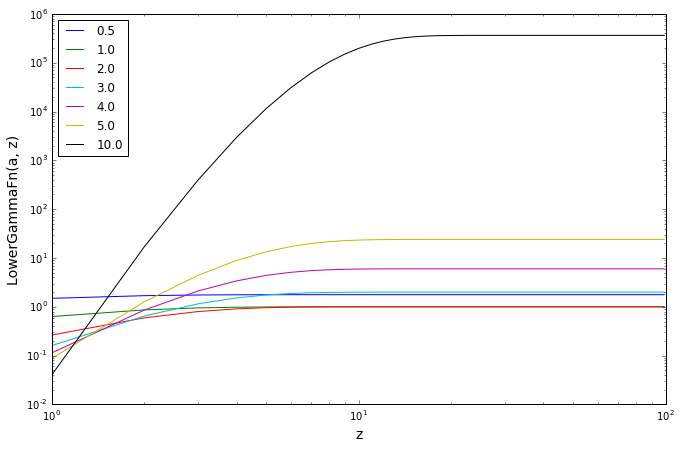

In [37]:
plt.figure(figsize=(11,7))
# sy.lowergamma(a, z)
plt_x = []
for k,anum in enumerate(a):
    plt_y = []
    for i,znum in enumerate(z):  # point for each z value
        plt_y.append(sy.lowergamma(anum, znum))
    plt_x = z # all of z's
    plt.plot(plt_x, plt_y, '-', label='%s'%anum)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=14)
plt.ylabel('LowerGammaFn(a, z)',fontsize=14)
plt.legend(loc='best', fontsize=12)

## Band Funciton using the Upper Incomplete Gamma Function:

In [91]:
alpha = -1.0286698070834475
beta = -2.2003327469378235
efold = 527.5755660475579
norm = 0.01748869026041366
engs = numpy.logspace(1, 8, 10000)

In [39]:
# norm*(efold**(alpha + 1.)*lowergamma(alpha + 1., engs/efold))

In [90]:
(alpha-beta)*efold

618.1407387106183

In [70]:
plt_x[2555:2563]

array([ 614.72215814,  615.71387138,  616.70718452,  617.70210014,
        618.69862083,  619.69674918,  620.69648778,  621.69783923])

In [71]:
plt_y[2555:2563]

[15.709595522718327,
 15.661920024971673,
 15.614336332578468,
 15.566844412893659,
 24.473777433359331,
 24.426468873217104,
 24.379251761968238,
 24.332125922839261]

def band(engs, params, flux):
    a = float(params[0]) # alpha: low-energy index
    b = float(params[1]) # beta: high-energy index
    efold = float(params[2]) # e-folding energy, E_0
    
    for i in range(len(engs)-1):
        if engs[i] < ((a - b) * efold):
            multiplier = ((100**(-a)) * (efold**(a+1.)))
            lowIntegral =  float(gammainc(a + 1., (engs[i]/efold)))
            highIntegral = float(gammainc(a + 1., (engs[i+1]/efold)))
            val = multiplier * (lowIntegral - highIntegral)
            flux[i] = val
        
        else:
            multiplier = ((1./(b + 1.))* ((100**(-a)) * ((a - b)**(a-b)) * -exp(b-a) * (efold**(a-b))))
            lowIntegral = engs[i]**(b+1.)
            highIntegral = engs[i+1]**(b+1.)
            val = multiplier * (lowIntegral - highIntegral)
            flux[i] = val

In [105]:
float(mp.gammainc(alpha + 1., enum/efold)),  float(mp.gammainc(alpha + 1., a=enum/efold))

(0.44206640296563326, 0.44206640296563326)

In [142]:
kim1 = ((1./(beta + 1.))* ((100**(-alpha)) * ((alpha - beta)**(alpha-beta)) * -numpy.exp(beta-alpha) * (efold**(alpha-beta)))) *(enum**(beta+1.))

In [143]:
kim2 = ((enum**(beta + 1.) * (((alpha-beta)*efold)**(alpha-beta))* -numpy.exp(-(alpha-beta)))/(beta + 1.))

In [144]:
kim1, kim2

(1.3700703392011353e-05, 1.200613576882143e-07)

In [140]:

def band(alpha, beta, efold, norm, energy):
    if enum < (efold*(alpha-beta)):
        eqn = ((100**-alpha) * (efold**(alpha + 1.)) * float(mp.gammainc(alpha + 1., a=energy/efold)))
        return eqn
    else:
        eqn = ((1./(beta + 1.))* ((100**(-beta)) * ((alpha - beta)**(alpha-beta)) 
                                  * -numpy.exp(beta-alpha) * (efold**(alpha-beta)))) * (energy**(beta+1.))
        return eqn

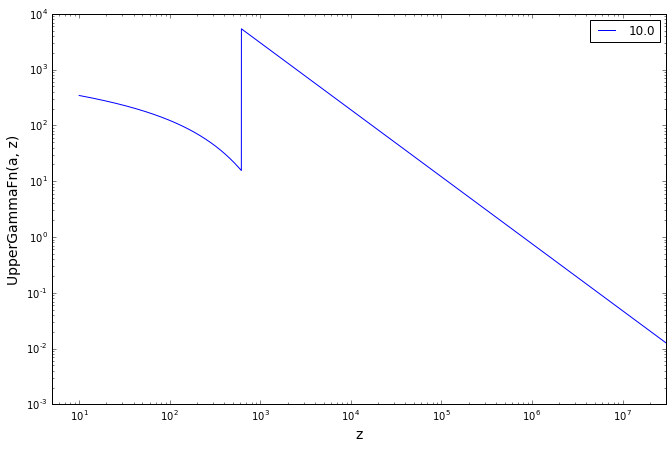

In [141]:
plt.figure(figsize=(11,7))
plt_x = []
plt_y = []

for i,enum in enumerate(engs):
    plt_y.append(band(alpha, beta, efold, norm, enum))
plt_x = engs
plt.plot(plt_x, plt_y, '-', label='%s'%anum)

#plt.vlines(efold, 10**(-15), 1, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5, 3E7)
#plt.ylim(1E-6, 1)
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show() 
#     if enum < (efold*(alpha-beta)):
#         band_lower = (100**-alpha)*(efold**(alpha + 1.) * float(mp.gammainc(alpha + 1., a=enum/efold))) # upper
#         plt_y.append(band_lower)
#     else:
#         band_upper = (100**-alpha)*((enum**(beta + 1.) * (((alpha-beta)*efold)**(alpha-beta))* -numpy.exp(-(alpha-beta)))/(beta + 1.))
#         #band_upper = norm*(((enum**(beta + 1.)) * (((alpha-beta)*numpy.exp(-1))**(alpha-beta)))/(beta + 1.))
#         plt_y.append(band_upper)

In [113]:
alpha, beta, norm, efold

(-1.0286698070834475,
 -2.2003327469378235,
 0.01748869026041366,
 527.5755660475579)

In [115]:
params = [alpha, beta, efold]

In [130]:
flux = numpy.zeros(len(engs))

In [132]:
len(flux)

10000

In [136]:
def band(engs, params, flux):
    a = float(params[0]) # alpha: low-energy index
    b = float(params[1]) # beta: high-energy index
    efold = float(params[2]) # e-folding energy, E_0
    
    for i in range(len(engs)-1):
        if engs[i] < ((a - b) * efold):
            multiplier = ((100**(-a)) * (efold**(a+1.)))
            lowIntegral =  float(mp.gammainc(a + 1., (engs[i]/efold)))
            highIntegral = float(mp.gammainc(a + 1., (engs[i+1]/efold)))
            val = multiplier * (lowIntegral - highIntegral)
            flux[i] = val
        
        else:
            multiplier = ((1./(b + 1.))* ((100**(-a)) * ((a - b)**(a-b)) * -numpy.exp(b-a) * (efold**(a-b))))
            lowIntegral = engs[i]**(b+1.)
            highIntegral = engs[i+1]**(b+1.)
            val = multiplier * (lowIntegral - highIntegral)
            flux[i] = val
        #return flux


In [139]:
band(engs, params, flux)

In [138]:
kzflux

In [78]:
x = 415
a = -1.3

In [79]:
100.0*(0.01*x)**(a + 1)/(a + 1)

-217.50253160870346

In [81]:
(100.0*((0.01*x)**(a + 1)))/(a + 1)

-217.50253160870346

In [83]:
(100**-a)

398.1071705534973

In [86]:
(1./100.)**a

398.1071705534973

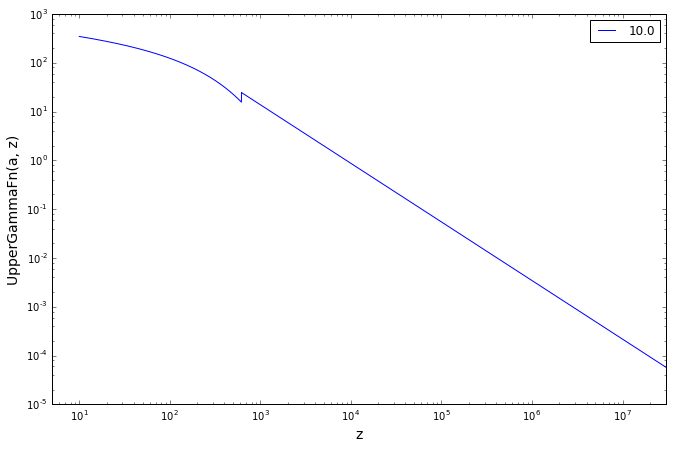

In [56]:
plt.figure(figsize=(11,7))
# sy.uppergamma(a, z)
plt_x = []
plt_y = []

for i,enum in enumerate(engs):  # point for each z value
    if enum < (efold*(alpha-beta)):
        band_lower = (100**-alpha)*(efold**(alpha + 1.) * float(mp.gammainc(alpha + 1., a=enum/efold))) # upper
        plt_y.append(band_lower)
    else:
        band_upper = (100**-alpha)*((enum**(beta + 1.) * (((alpha-beta)*efold)**(alpha-beta))* -numpy.exp(-(alpha-beta)))/(beta + 1.))
        #band_upper = norm*(((enum**(beta + 1.)) * (((alpha-beta)*numpy.exp(-1))**(alpha-beta)))/(beta + 1.))
        plt_y.append(band_upper)
plt_x = engs
plt.plot(plt_x, plt_y, '-', label='%s'%anum)

#plt.vlines(efold, 10**(-15), 1, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5, 3E7)
#plt.ylim(1E-6, 1)
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show() 

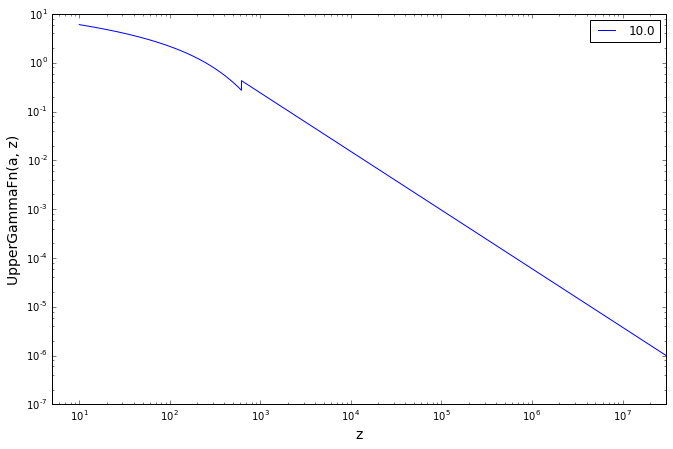

In [54]:
plt.figure(figsize=(11,7))
# sy.uppergamma(a, z)
plt_x = []
plt_y = []

for i,enum in enumerate(engs):  # point for each z value
    if enum < (efold*(alpha-beta)):
        band_lower = norm*(100**-alpha)*(efold**(alpha + 1.) * sy.uppergamma(alpha + 1., enum/efold))
        plt_y.append(band_lower)
    else:
        band_upper = norm*(100**-alpha)*((enum**(beta + 1.)) * (((alpha-beta)*efold)**(alpha-beta))* -numpy.exp(-(alpha-beta)))/(beta + 1.)
        #band_upper = norm*(((enum**(beta + 1.)) * (((alpha-beta)*numpy.exp(-1))**(alpha-beta)))/(beta + 1.))
        plt_y.append(band_upper)
plt_x = engs
plt.plot(plt_x, plt_y, '-', label='%s'%anum)

#plt.vlines(efold, 10**(-15), 1, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5, 3E7)
#plt.ylim(1E-6, 1)
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show() 

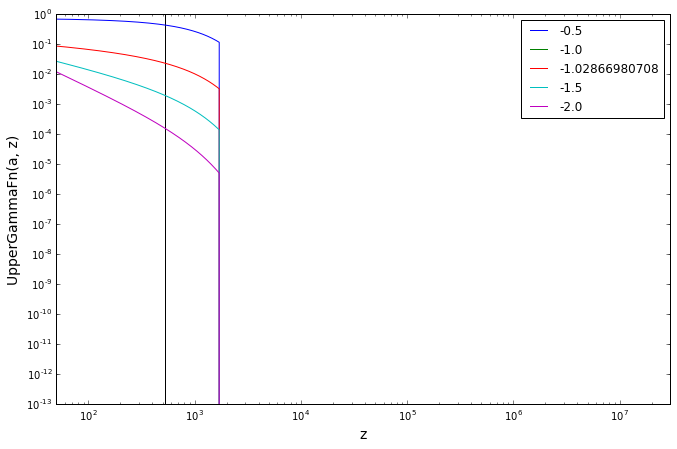

In [276]:
plt.figure(figsize=(11,7))
# sy.uppergamma(a, z)
plt_x = []
for k,anum in enumerate(a):
    plt_y = []
    for i,enum in enumerate(engs):  # point for each z value
        if enum < efold:
            band_lower = norm*(efold**(anum + 1.) * sy.uppergamma(anum + 1., enum/efold))
            plt_y.append(band_lower)
        else:
            band_upper = norm*(((enum**(beta + 1.)) * (((anum-beta)*numpy.exp(-1))**(anum-beta)))/(beta + 1.))
            plt_y.append(band_upper)
    plt_x = z # all of z's
    plt.plot(plt_x, plt_y, '-', label='%s'%anum)

plt.vlines(efold, 10**(-15), 1, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5E1, 3E7)
plt.ylim(10**(-13), 1)
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)',fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show() 

In [268]:
efold

527.5755660475579

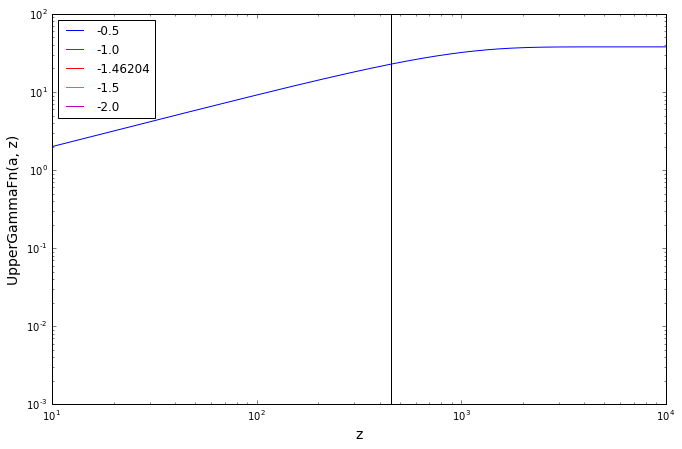

In [245]:
plt.figure(figsize=(11,7))
# sy.uppergamma(a, z)
plt_x = []
for k,anum in enumerate(a):
    plt_y = []
    for i,enum in enumerate(engs):  # point for each z value
        plt_y.append(efold**(anum + 1.) * sy.lowergamma(anum + 1., enum/efold))
    plt_x = z # all of z's
    plt.plot(plt_x, plt_y, '-', label='%s'%anum)

plt.vlines(efold, 10**(-3), 100, color='black')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(3, 10**8)
#plt.ylim(10**(-15), 10)
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)',fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show() 

/Users/KimiZ/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


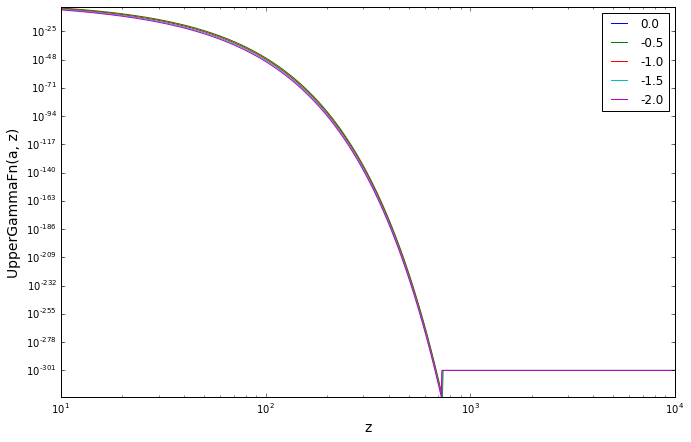

In [220]:
plt.figure(figsize=(11,7))
# sy.uppergamma(a, z)
plt_x = []
for k,anum in enumerate(a):
    plt_y = []
    for i,znum in enumerate(z):  # point for each z value
        plt_y.append(sy.uppergamma(anum, znum))
    plt_x = z # all of z's
    plt.plot(plt_x, plt_y, '-', label='%s'%anum)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=14)
plt.ylabel('UpperGammaFn(a, z)',fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show() 

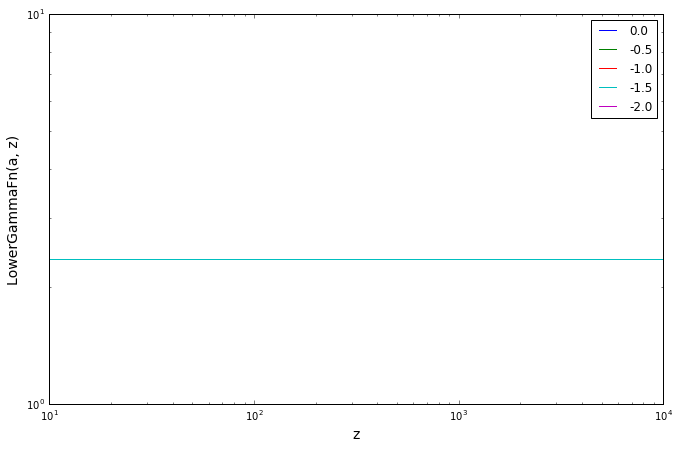

In [221]:
plt.figure(figsize=(11,7))
# sy.lowergamma(a, z)
plt_x = []
for k,anum in enumerate(a):
    plt_y = []
    for i,znum in enumerate(z):  # point for each z value
        plt_y.append(sy.lowergamma(anum, znum))
    plt_x = z # all of z's
    plt.plot(plt_x, plt_y, '-', label='%s'%anum)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=14)
plt.ylabel('LowerGammaFn(a, z)',fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

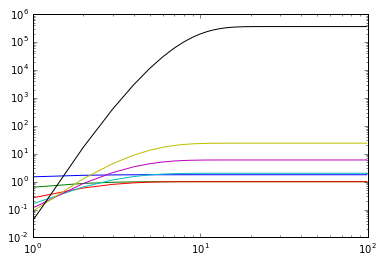

In [199]:
plt_x = []
for k,l in enumerate(a):
    plt_y = []
    for i,j in enumerate(z): 
        plt_y.append(sy.lowergamma(l, j))
    plt_x=z
    plt.plot(plt_x, plt_y, '-')

plt.xscale('log')
plt.yscale('log')
# plt.xlabel('logged')
# plt.ylabel('logged')
#plt.title('Upper Incomplete Gamma Fn.')
#plt.show()

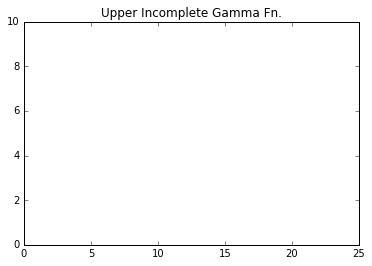

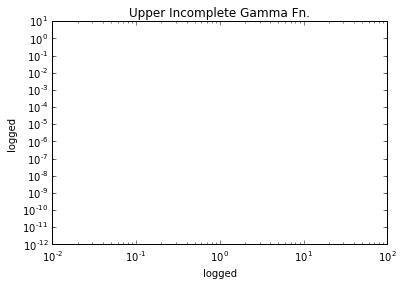

ValueError: Unrecognized character i in format string

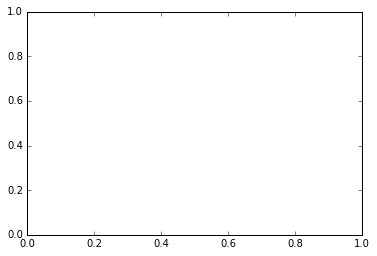

In [101]:
for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.uppergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, '--')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('logged')
# plt.ylabel('logged')
plt.title('Upper Incomplete Gamma Fn.')
plt.show()

# ********************************************************************

for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.uppergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('logged')
plt.ylabel('logged')
plt.title('Upper Incomplete Gamma Fn.')
plt.show()

# ********************************************************************

for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.uppergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, 'i')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('logged')
#plt.ylabel('logged')
plt.title('Upper Incomplete Gamma Fn.')
plt.show()

# ********************************************************************

for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.uppergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, 'i')
#plt.xscale('log')
plt.yscale('log')
#plt.xlabel('logged')
plt.ylabel('logged')
plt.title('Upper Incomplete Gamma Fn.')
plt.show()

# Plots of lower gamma

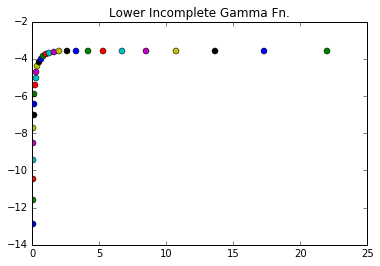

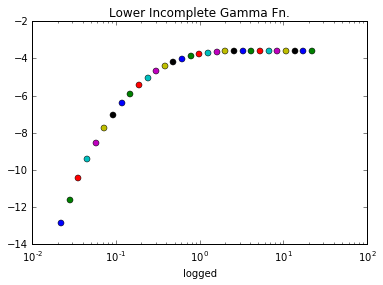

In [91]:
for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.lowergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, 'o')
plt.title('Lower Incomplete Gamma Fn.')
plt.show()

# ********************************************************************

for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.lowergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, 'o')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('logged')
#plt.ylabel('logged')
plt.title('Lower Incomplete Gamma Fn.')
plt.show()

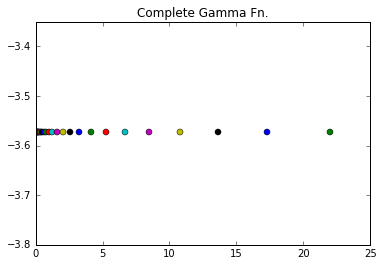

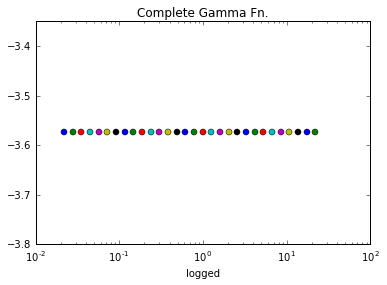

In [96]:
for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.lowergamma(alpha+1., j/epk) + sy.uppergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, 'o')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('logged')
# plt.ylabel('logged')
plt.title('Complete Gamma Fn.')
plt.show()

# ********************************************************************

for i,j in enumerate(engs):
    plt_x = j/epk
    plt_y = sy.lowergamma(alpha+1., j/epk) + sy.uppergamma(alpha+1., j/epk)
    plt.plot(plt_x, plt_y, 'o')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('logged')
#plt.ylabel('logged')
plt.title('Complete Gamma Fn.')
plt.show()


### The incomplete gamma functions satisfy simple recurrence relations:

0 is the lower limit and b is the upper limit, set a 2 by mp.mpf(2)

mp.mpf just means mpf float.

In [ ]:
mp.mpf(2)

In [ ]:
mp.dps = 25
z, b = mp.mpf(3.5), mp.mpf(2)

In [ ]:
mp.gammainc(z+1, b)

In [ ]:
z * mp.gammainc(z,b) + b**z*mp.exp(-b)

In [ ]:
mp.gammainc(z+1,0,b)

In [ ]:
z * mp.gammainc(z,0,b) - b**z*mp.exp(-b)

In [ ]:
engs1 = numpy.arange(1,10000000,1)

In [ ]:
len(engs1)

In [ ]:
cpl_Idx = -1.8
#engs = 10000000.0
cutoff = 100.0

In [ ]:
a = float(sy.uppergamma(cpl_Idx+1., (engs1[100000]/cutoff))); a

In [ ]:
mp.gammainc(cpl_Idx+1., 0, (engs1[100000]/cutoff))